# CNN - Ciraf 10 

In [46]:
import configparser
import io
import os


from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D



In [47]:
try:
    from configparser import ConfigParser
except ImportError:
    from ConfigParser import ConfigParser  # ver. < 3.0

# instantiate
config = ConfigParser()

# parse existing file
config.read('example.ini')

['example.ini']

In [16]:
#Reading the Parameters 
batch_size = int(config.get('common','batch_size'))
num_classes =int(config.get('common','num_classes'))
epochs = int(config.get('common','epochs'))
data_augmentation = bool(config.get('common','data_augmentation'))
conv2d=int(config.get('common','conv2d'))
conv2d1=int(config.get('common','conv2d1'))
dense=int(config.get('model1','dense'))

print(batch_size)
print(num_classes)
print(epochs)
print(data_augmentation)
print(dense)

32
10
100
True
128


In [17]:

num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model1.h5'

In [48]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [49]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


# Model 1

Running the Base Code

In [20]:
model = Sequential()
model.add(Conv2D(conv2d, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(conv2d, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(conv2d1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(conv2d1, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(dense))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                                     epochs=epochs,
                                     validation_data=(x_test, y_test),
                                     workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print(scores)


Using real-time data augmentation.
Epoch 1/100
1563/1563 [==============================] - 162s 104ms/step - loss: 1.9631 - acc: 0.2695 - val_loss: 1.6814 - val_acc: 0.3991
Epoch 2/100
1563/1563 [==============================] - 159s 102ms/step - loss: 1.6933 - acc: 0.3784 - val_loss: 1.4851 - val_acc: 0.4602
Epoch 3/100
1563/1563 [==============================] - 160s 102ms/step - loss: 1.5699 - acc: 0.4301 - val_loss: 1.3731 - val_acc: 0.5019
Epoch 4/100
1563/1563 [==============================] - 163s 104ms/step - loss: 1.4921 - acc: 0.4592 - val_loss: 1.3071 - val_acc: 0.5317
Epoch 5/100
1563/1563 [==============================] - 159s 102ms/step - loss: 1.4307 - acc: 0.4850 - val_loss: 1.2814 - val_acc: 0.5385
Epoch 6/100
1563/1563 [==============================] - 159s 101ms/step - loss: 1.3733 - acc: 0.5102 - val_loss: 1.2288 - val_acc: 0.5592
Epoch 7/100
1563/1563 [==============================] - 161s 103ms/step - loss: 1.3273 - acc: 0.5257 - val_loss: 1.1406 - val_acc:

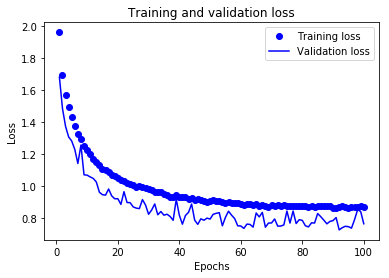

In [23]:
#Plotting Training Loss vs Validation Loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


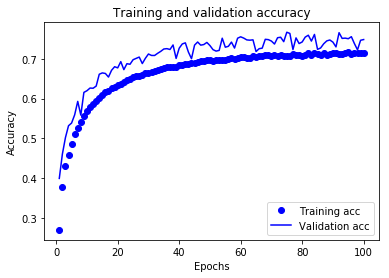

In [24]:
#Plotting Training Accuracy vs Validation Accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Model 2

In this Model, adding gaussian noise to both layers and adding gaussian dropout to reduce overfitting 

In [18]:
#reading .ini file
try:
    from configparser import ConfigParser
except ImportError:
    from ConfigParser import ConfigParser  # ver. < 3.0

# instantiate
config = ConfigParser()

# parse parameters from file
config.read('example.ini')
#Reading the Parameters 
batch_size = int(config.get('common','batch_size'))
num_classes =int(config.get('common','num_classes'))
epochs = int(config.get('common','epochs'))
data_augmentation = bool(config.get('common','data_augmentation'))
conv2d=int(config.get('common','conv2d'))
conv2d1=int(config.get('common','conv2d1'))
dense=int(config.get('model2','dense'))
noise=int(config.get('model2','noise'))
dropout=int(config.get('model2','dropout'))

print (epochs)



save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model2.h5'



50


In [36]:
#Building the Model
noise = keras.layers.GaussianNoise(noise)
dropout = keras.layers.GaussianDropout(dropout)
model = Sequential()
model.add(Conv2D(conv2d, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(conv2d, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(noise)
model.add(dropout)

model.add(Conv2D(conv2d1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(conv2d1, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(noise)
model.add(dropout)


model.add(Flatten())
model.add(Dense(dense))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                                     epochs=epochs,
                                     validation_data=(x_test, y_test),
                                     workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print(scores)



Using real-time data augmentation.
Epoch 1/50
1563/1563 [==============================] - 210s 135ms/step - loss: 2.2031 - acc: 0.1775 - val_loss: 2.0983 - val_acc: 0.2049
Epoch 2/50
1563/1563 [==============================] - 235s 150ms/step - loss: 1.9611 - acc: 0.2751 - val_loss: 1.8641 - val_acc: 0.3196
Epoch 3/50
1563/1563 [==============================] - 240s 154ms/step - loss: 1.8446 - acc: 0.3268 - val_loss: 1.8232 - val_acc: 0.3272
Epoch 4/50
1563/1563 [==============================] - 224s 143ms/step - loss: 1.7768 - acc: 0.3548 - val_loss: 1.7347 - val_acc: 0.3778
Epoch 5/50
1563/1563 [==============================] - 263s 168ms/step - loss: 1.7264 - acc: 0.3721 - val_loss: 1.7787 - val_acc: 0.3638
Epoch 6/50
1563/1563 [==============================] - 288s 184ms/step - loss: 1.6864 - acc: 0.3870 - val_loss: 1.7073 - val_acc: 0.3785
Epoch 7/50
1563/1563 [==============================] - 288s 184ms/step - loss: 1.6437 - acc: 0.4039 - val_loss: 1.7110 - val_acc: 0.3979

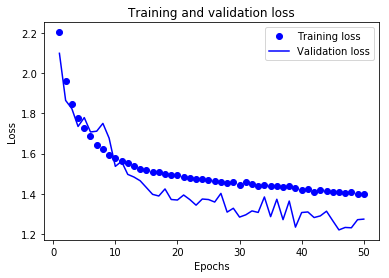

In [37]:
#Plotting Training Loss vs Validation Loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



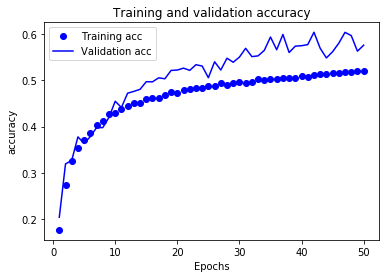

In [39]:
#Plotting Training Accuracy vs Validation Accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

# # Model 3

In this Model, adding a batch normalization layer - activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.


In [50]:
#reading .ini file
import os
try:
    from configparser import ConfigParser
except ImportError:
    from ConfigParser import ConfigParser  # ver. < 3.0

# instantiate
config = ConfigParser()

# parse existing file
config.read('example.ini')

# parse parameters from file
#Reading the Parameters 
batch_size = int(config.get('common','batch_size'))
num_classes =int(config.get('common','num_classes'))
epochs = int(config.get('common','epochs'))
data_augmentation = bool(config.get('common','data_augmentation'))
conv2d=int(config.get('common','conv2d'))
conv2d1=int(config.get('common','conv2d1'))
print (batch_size)
print (epochs)


save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model3.h5'



32
50


In [55]:
from keras.layers.normalization import BatchNormalization



In [ ]:
#Building the Model

model = Sequential()
model.add(Conv2D(conv2d, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(conv2d, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(conv2d1, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(conv2d1, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(dense))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=128,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                                     epochs=epochs,
                                     validation_data=(x_test, y_test),
                                     workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print(scores)




Using real-time data augmentation.
Epoch 1/50
1563/1563 [==============================] - 396s 253ms/step - loss: 1.8752 - acc: 0.3174 - val_loss: 1.7275 - val_acc: 0.3740
Epoch 2/50
1563/1563 [==============================] - 386s 247ms/step - loss: 1.6363 - acc: 0.4141 - val_loss: 1.6046 - val_acc: 0.4335
Epoch 3/50
1563/1563 [==============================] - 387s 247ms/step - loss: 1.5500 - acc: 0.4545 - val_loss: 1.5082 - val_acc: 0.4642
Epoch 4/50
1563/1563 [==============================] - 660s 422ms/step - loss: 1.4848 - acc: 0.4802 - val_loss: 1.4667 - val_acc: 0.4842
Epoch 5/50
1563/1563 [==============================] - 373s 238ms/step - loss: 1.4326 - acc: 0.5039 - val_loss: 1.3842 - val_acc: 0.5127
Epoch 6/50
1563/1563 [==============================] - 375s 240ms/step - loss: 1.3851 - acc: 0.5213 - val_loss: 1.2848 - val_acc: 0.5529
Epoch 7/50
1563/1563 [==============================] - 374s 239ms/step - loss: 1.3393 - acc: 0.5376 - val_loss: 1.3063 - val_acc: 0.5432

In [ ]:
#Plotting Training Loss vs Validation Loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [ ]:
#Plotting Training Accuracy vs Validation Accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Model 4

 In this model,am removing dropouts from first two layers and increasing the layer before ouput to have 512 neurons

In [ ]:
batch_size = 32
num_classes = 10
epochs = 30
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model4.h5'

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.1))
model.add(Dense(512))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history=model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
#Plotting Training Loss vs Validation Loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [ ]:
#Plotting Training Accuracy vs Validation Accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



# Model 5 - Experimenting with LeakyRely


replaced the ReLU function with Leaky ReLU again because it is better than ReLU function as it also has a small negative edge which works better with negative values. 

In [ ]:
#Reading the Parameters 
batch_size = int(config.get('common','batch_size'))
num_classes =int(config.get('common','num_classes'))
epochs = int(config.get('common','epochs'))
data_augmentation = bool(config.get('common','data_augmentation'))
conv2d=int(config.get('common','conv2d'))
conv2d1=int(config.get('common','conv2d1'))
dense=int(config.get('model3','dense'))

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model5.h5'

In [ ]:
model = Sequential()
model.add(Conv2D(conv2d, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))

leakyReLU = keras.layers.LeakyReLU(alpha=0.3)

model.add(leakyReLU)
model.add(Conv2D(conv2d, (3, 3)))
model.add(leakyReLU)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(conv2d1, (3, 3), padding='same'))
model.add(leakyReLU)
model.add(Conv2D(conv2d1, (3, 3)))
model.add(leakyReLU)
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(dense))
model.add(leakyReLU)
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                                     epochs=epochs,
                                     validation_data=(x_test, y_test),
                                     workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print(scores)


In [ ]:
#Plotting Training Loss vs Validation Loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
#Plotting Training Accuracy vs Validation Accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
